In [4]:


import os

import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import pickle

In [5]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")
    model_name = path.split('_')[-1]

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    with open(os.path.join(path, 'commandline_arguments.p'), 'rb') as file:
        command_line = pickle.load(file)
    
    return domain, vec_d, vec_y, img_locs, model_name, df, command_line

In [3]:
ex = '2023-09-28 12:47:42.403147_weah_sdcn/'
#ex = '2023-10-03 15:29:14.413030_weah_dec/'
#ex = '2023-10-10 11:09:07.411289_weah_dec/'

ex = '2023-10-15 16:52:23.823748_weah_sdcn/'

ex = '2024-04-02_12:07:57.459456_her3_sdcn/'
ex = '2024-04-02_12:54:55.231653_her3_sdcn/' # 4 domians
ex = '2024-04-02_12:30:40.399514_her3_sdcn/'

ex = '2024-04-02_14:32:11.383136_her3_dec/'

In [182]:
domain, vec_d, vec_y, img_locs, model_name, results_df, command_line = load_files(ex)
print(command_line)

Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=1, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=9, epos_min=0, epo_te=1, warmup=100, debug=False, dmem=False, no_dump=False, trainer='cluster', out='zoutput', dpath='../../HER2/combined_train', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath='domid/algos/builder_dec.py', exptag='exptag', aggtag='aggtag', bm_dir=None, plot_data=None, outp_dir='zoutput/benchmarks/shell_benchmark', param_idx=True, msel='val', model='dec', acon=None, task='her3', bs=168, split=0.0, te_d=['0'], tr_d=['0', '1', '2', '3'], san_check=False, san_num=8, loglevel='DEBUG', shuffling_off=True, zd_dim=500, zx_dim=0, zy_dim=64, topic_dim=3, nname_encoder_x2topic_h=None, npath_encoder_x2topic_h=None, nname_encoder_sandwich_x2h4zd=None, npath_encoder_sandwich_x2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, tau=0.05, epos_per_match_u

In [183]:
set(domain)

{1, 2, 3}

In [184]:



def plot_something_per_domain(domain, another_label, counts, fs,colors, legend = False, thres = None, ax=None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    if ax is None:
        ax = plt.gca()
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)
        

    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ax.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = colors[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    ax.set_ylabel("Proportion", fontsize=fs)
    ax.set_xticks(x, x_ticks, fontsize=fs)
    ax.set_xlabel("Cluster", fontsize=fs)
    ax.set_ylim(0, 1.025)
    #ax.margins(1.5,1.5)
   
    if legend:
        ax.legend(legend, fontsize= fs-4, bbox_to_anchor=(1.7, 0.5))
    else:
        ax.legend(u_another_label)

    return ax
    

    #return 
        
    
    
    

In [185]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    array_counters=[]
    for i in u_something:
        for j in u_domain:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==j and another_label[idx]==i:
                    counter+=1
            array_counters.append(counter)
    return array_counters  

In [186]:



def img_loc_true_label2(results_df, df, df_label):
    """
    img_loc_true_label - location of the image (ex. .../../../aperio-001-0_anno_2_reg_4CAH_patchnumber_3.png)
    df - dataframe that compiles img loc reference and other labels corresponding to that image
    df_label - the name of the label in the df that one would like to retrieve from the df
    """
    
    merged_df = pd.merge(results_df, df, on='img_names', how='inner')
    another_label_array = merged_df[df_label].tolist()

    return another_label_array

In [187]:
results_df.head()

,vec_y_labels,vec_d_labels,predictions,image_id_labels
0,0,0,1,"../../HER2/combined_train/class1jpg/9981-5013,..."
1,0,0,2,../../HER2/combined_train/class1jpg/S03-3203-6...
2,0,0,1,../../HER2/combined_train/class1jpg/s04-1169-2...
3,0,0,1,../../HER2/combined_train/class1jpg/s06-6874-1...
4,0,0,1,../../HER2/combined_train/class1jpg/s06-2733-3...


In [188]:
import pandas as pd
import os
print(os.listdir('../../..'))
df = pd.read_csv('../../../parsed_HER2.csv')
print(df.head())
results_df['img_names']=results_df['image_id_labels'].str.split('/').str.get(-1)
df['img_names']=df['img_id'].str.split('/').str.get(-1)


['.bash_logout', '.bash_profile', '.bashrc', '.emacs', '.mozilla', '.xemacs', '.gnupg', '.cache', '.config', '.ssh', '.local', 'perl5', '.pki', '.nv', '.jupyter', '.gitconfig', '.Xauthority', 'png_files', 'old_versions_code', '.ipython', '.ipynb_checkpoints', 'miccai', 'domid_env', 'DomId', 'Anaconda3-2023.03-Windows-x86_64.exe', 'Anaconda3-2023.03-Linux-x86_64.sh', 'anaconda3', '.conda', '.condarc', 'HER2', '.viminfo', 'histocartography__', 'graph_wsi.ipynb', 'scdn', 'Aperio_dataset_v10.csv', 'dset_WEAH.csv', 'data_Outside', 'graph_bs_1.png', 'Aperio_dataset_v10_.csv', 'README_preliminary_results_SDCN.txt', 'WashU-WSI-data', 'graph_vis_data', 'WashU_with_coord', '.python_history', 'outside_vis.ipynb', 'outside_viz', 'domid_upgraded', '.lesshst', 'parsed_items.csv', 'parsed_HER2.csv', '.bash_history']
                               img_path                      img_id  \
0     class1jpg/S06-106-7873-5226H2.jpg     S06-106-7873-5226H2.jpg   
1        class1jpg/9981-5013,5325FD.jpg      

In [189]:
set(domain)

{1, 2, 3}

In [190]:
df

,img_path,img_id,Class,subject,machine,machine_encod,X,Y,img_names
0,class1jpg/S06-106-7873-5226H2.jpg,S06-106-7873-5226H2.jpg,class1jpg,1_0,H2,2,7873,52262,S06-106-7873-5226H2.jpg
1,"class1jpg/9981-5013,5325FD.jpg","9981-5013,5325FD.jpg",class1jpg,1_1,FD,0,5013,5325,"9981-5013,5325FD.jpg"
2,class1jpg/S04-6537-18646-21687ND.jpg,S04-6537-18646-21687ND.jpg,class1jpg,1_2,ND,3,18646,21687,S04-6537-18646-21687ND.jpg
3,"class1jpg/S03-3203-6750,9087FD.jpg","S03-3203-6750,9087FD.jpg",class1jpg,1_3,FD,0,6750,9087,"S03-3203-6750,9087FD.jpg"
4,"class1jpg/9981-8999,2673ND.jpg","9981-8999,2673ND.jpg",class1jpg,1_1,ND,3,8999,2673,"9981-8999,2673ND.jpg"
...,...,...,...,...,...,...,...,...,...
667,class3jpg/s04-4066-5174-10777H2.jpg,s04-4066-5174-10777H2.jpg,class3jpg,3_1,H2,2,5174,107772,s04-4066-5174-10777H2.jpg
668,class3jpg/s06-8342-71049-14108H1.jpg,s06-8342-71049-14108H1.jpg,class3jpg,3_16,H1,1,71049,141081,s06-8342-71049-14108H1.jpg
669,class3jpg/s05-555-19084-20723FD.jpg,s05-555-19084-20723FD.jpg,class3jpg,3_3,FD,0,19084,20723,s05-555-19084-20723FD.jpg
670,class3jpg/s05-555-20006-15153H1.jpg,s05-555-20006-15153H1.jpg,class3jpg,3_3,H1,1,20006,151531,s05-555-20006-15153H1.jpg


In [191]:
resp_label = img_loc_true_label2(results_df, df, 'machine_encod')


In [192]:
true_responders_per_domain= something_per_domain(domain, resp_label)

unique labels [0 1 2 3]


<Axes: xlabel='Cluster', ylabel='Proportion'>

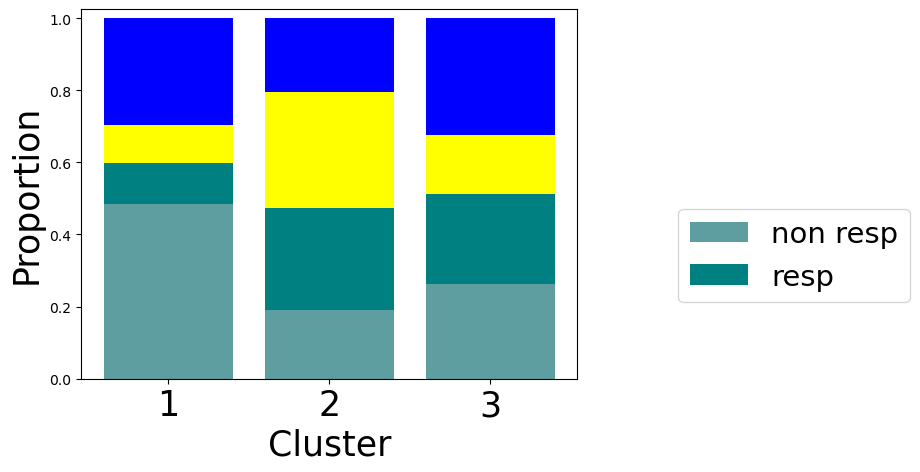

In [193]:
resp_label = img_loc_true_label2(results_df, df, 'machine_encod')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal', 'yellow', 'blue'], legend = ['non resp', 'resp'])

unique labels ['class1jpg' 'class2jpg' 'class3jpg']


<Axes: xlabel='Cluster', ylabel='Proportion'>

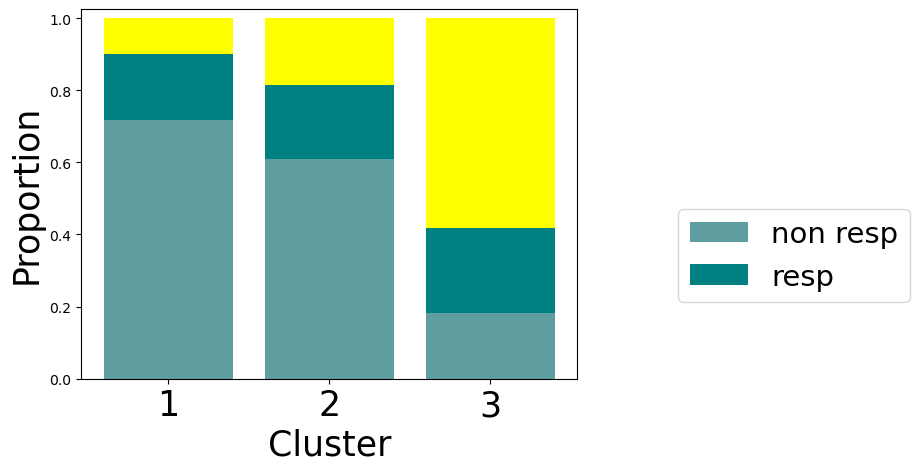

In [194]:
resp_label = img_loc_true_label2(results_df, df, 'Class')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal', 'yellow', 'blue'], legend = ['non resp', 'resp'])

In [195]:
# ann_label = img_loc_true_label2(results_df, df, 'ann')
# true_ann_per_domain= something_per_domain(domain, ann_label)

# plot_something_per_domain(domain, ann_label, true_ann_per_domain, 25, ['cadetblue', 'teal', 'lightblue'], legend = ['CAH', 'Car','Benign'])


In [196]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num, N, base_path="../"):
    plt.figure(figsize=(10, 10))
    for j in range(1, N):
        d_path = d[j] if d[j].startswith("/") else base_path + d[-j]
        img = torchvision.io.read_image(d_path)
        plt.subplot(10, 10, j)
        plt.imshow(img.permute(1, 2, 0))
        plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
        name = d[j].split("/")[-1].split('-')
        #print(name)
        #title = "responder" +name[2].split('_')[2]
    # plt.suptitle("Domain " + str(num), fontsize=50)
    #     # if j == 1:
    #     #     plt.ylabel("Domain " + str(num), fontsize=15, fontweight="bold")
    plt.show()

In [197]:
# Seperate predicted domains by numbers. All predicted 1s are in d1, etc....
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
for i in range(len(domain)):
    if i%2==0:
        if domain[i] == 1:
            d1.append(img_locs[i])
        if domain[i] == 2:
            d2.append(img_locs[i])
        if domain[i] == 3:
            d3.append(img_locs[i])
        if domain[i] == 4:
            d4.append(img_locs[i])
        if domain[i] == 5:
            d5.append(img_locs[i])
        if domain[i] == 6:
            d6.append(img_locs[i])
# d3 = d2[-1000:]
# d5+=d5*10
d3+=d3*10
d2+=d2*10
# d1+=d1*2
domain_images_lib = [d1, d2, d3, d4, d5, d6]

In [198]:
15*20

300

In [199]:

print(len(d1), len(d2), len(d3), len(d4), len(d5), len(d6))

139 792 1375 0 0 0


unique labels ['class1jpg' 'class2jpg' 'class3jpg']
unique labels ['FD' 'H1' 'H2' 'ND']


/tmp/ipykernel_1703579/3471661417.py:57: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/tmp/ipykernel_1703579/3471661417.py:57: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


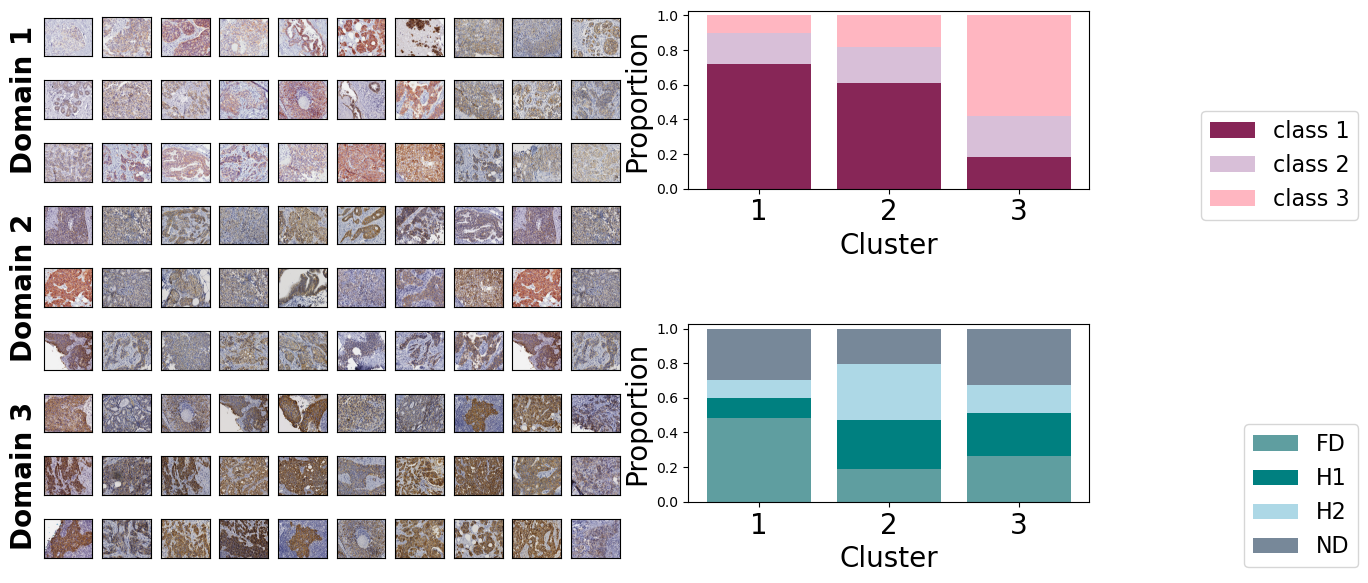

In [200]:
import matplotlib.pyplot as plt
import torchvision
from matplotlib.gridspec import GridSpec

fs_xlabel =15
            
fig = plt.figure(figsize=(15,8), layout="constrained")
N_split=10
n_rows = 10
n_cols=20
gs = GridSpec(n_rows, n_cols, figure=fig)
counter = 0
counter_d = 0
k=1
sub_row_num = 3
domain_to_plot = [0]*sub_row_num+[1]*sub_row_num+[2]*sub_row_num
for i in range(0, N_split):
    counter_d=0
    for j in range(1, n_rows):
        if j>0:
            
            ax = fig.add_subplot(gs[j, i])
            domain_to_plot_idx = domain_to_plot[counter_d]
            #print('row',j,'column', i, domain_to_plot_idx, counter)
            counter_d+=1
            d = domain_images_lib[domain_to_plot_idx]
            base_path="../"
            d_path = d[counter] if d[counter].startswith("/") else base_path + d[counter]
            img = torchvision.io.read_image(d_path)
            ax.imshow(img.permute(1, 2, 0))
            ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
            counter+=1
            if i==0:
                
                if j==2 or j==5 or j==8:
                
                    ax.set_ylabel('Domain '+str(domain_to_plot_idx+1), fontsize = fs_xlabel+5, weight='bold')
          
            
        

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
n_mid = int(n_rows//2)

ax2 = fig.add_subplot(gs[1:n_mid-1, N_split+1:-2])
ax3 = fig.add_subplot(gs[n_mid+1:-1, N_split+1:-2])


resp_label = img_loc_true_label2(results_df, df, 'Class')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 20, ['#872657', 'thistle', 'lightpink'], legend = ['class 1', 'class 2', 'class 3'], ax = ax2)

ann_label = img_loc_true_label2(results_df, df, 'machine')
true_ann_per_domain= something_per_domain(domain, ann_label)
plot_something_per_domain(domain, ann_label, true_ann_per_domain, 20, ['cadetblue', 'teal', 'lightblue', 'lightslategrey'], legend = ['FD', 'H1','H2', 'ND'], ax=ax3)

fig.tight_layout()
plt.show()

In [29]:
ex_sdcn = '2024-04-02_12:54:55.231653_her3_sdcn/'


ex = '2024-04-02_12:54:55.231653_her3_sdcn/' # 4 domians
ex_sdcn = '2024-04-02_12:30:40.399514_her3_sdcn/'

ex_dec = '2024-04-02_14:32:11.383136_her3_dec/'

ex_sdcn = '2024-04-05_14:51:11.529695_her3_sdcn/'
ex_dec = '2024-04-05_15:07:18.859742_her3_dec/'

In [30]:
domain_sdcn, vec_d, vec_y, img_locs_sdcn, model_name, results_df_sdcn, command_line_sdcn = load_files(ex_sdcn)
domain_dec, vec_d, vec_y, img_locs_dec, model_name, results_df_dec, command_line = load_files(ex_dec)

In [31]:
def cpai_score(img_locs, domain):
    her2_df = pd.read_csv('../../../parsed_HER2.csv')
    print(her2_df.head())
    img_locs_short = [im.split('/')[-1] for im in img_locs]
    sub_df = pd.DataFrame({'img_id': img_locs_short, 'domains': domain})
    merged_df = pd.merge(her2_df, sub_df, on='img_id', how='inner')
    subjects = merged_df['subject'].unique()
    scanners = merged_df['machine'].unique()
    P = []
    for sub in subjects:
         
        sub_m_df = merged_df[merged_df['subject']==sub]
        for scan_mach in scanners:
            sub_m_df_ = sub_m_df[sub_m_df['machine']==scan_mach]
        
            domain_counts = sub_m_df_['domains'].value_counts()
            # print(domain_counts)
            total_domains = len(sub_m_df_)
            # print(total_domains)
            if total_domains>1:
                probability_same_value = sum((count * (count - 1)) / (total_domains * (total_domains - 1)) for count in domain_counts)
                # (count * (count - 1)) calculates the number of ways to select two domains with the same value.
                # (total_domains * (total_domains - 1)) calculates the total number of ways to select any two domains from the dataset


                P.append(probability_same_value)
    
    grouped = merged_df.groupby('subject')['domains'].nunique()
    probability_same_domain = (grouped.value_counts() / len(grouped))#.round(2)
    # print(probability_same_domain, len(grouped))
    return P, merged_df, probability_same_domain

In [32]:
P, m_df, p_ = cpai_score(img_locs_sdcn, domain_sdcn)
print(P)
print(np.mean(P), p_)


                               img_path                      img_id  \
0     class1jpg/S06-106-7873-5226H2.jpg     S06-106-7873-5226H2.jpg   
1        class1jpg/9981-5013,5325FD.jpg        9981-5013,5325FD.jpg   
2  class1jpg/S04-6537-18646-21687ND.jpg  S04-6537-18646-21687ND.jpg   
3    class1jpg/S03-3203-6750,9087FD.jpg    S03-3203-6750,9087FD.jpg   
4        class1jpg/9981-8999,2673ND.jpg        9981-8999,2673ND.jpg   

       Class subject machine  machine_encod      X      Y  
0  class1jpg     1_0      H2              2   7873  52262  
1  class1jpg     1_1      FD              0   5013   5325  
2  class1jpg     1_2      ND              3  18646  21687  
3  class1jpg     1_3      FD              0   6750   9087  
4  class1jpg     1_1      ND              3   8999   2673  
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.0, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 1.0, 0.5238095238095237, 1.0, 0.5238095238095237, 0.

In [33]:
print(pd.Series(P).describe())

count    132.000000
mean       0.626227
std        0.386354
min        0.000000
25%        0.333333
50%        0.633333
75%        1.000000
max        1.000000
dtype: float64


In [34]:
P, m_df, p_ = cpai_score(img_locs_dec, domain_dec)
print(P)
print(np.mean(P), p_)

                               img_path                      img_id  \
0     class1jpg/S06-106-7873-5226H2.jpg     S06-106-7873-5226H2.jpg   
1        class1jpg/9981-5013,5325FD.jpg        9981-5013,5325FD.jpg   
2  class1jpg/S04-6537-18646-21687ND.jpg  S04-6537-18646-21687ND.jpg   
3    class1jpg/S03-3203-6750,9087FD.jpg    S03-3203-6750,9087FD.jpg   
4        class1jpg/9981-8999,2673ND.jpg        9981-8999,2673ND.jpg   

       Class subject machine  machine_encod      X      Y  
0  class1jpg     1_0      H2              2   7873  52262  
1  class1jpg     1_1      FD              0   5013   5325  
2  class1jpg     1_2      ND              3  18646  21687  
3  class1jpg     1_3      FD              0   6750   9087  
4  class1jpg     1_1      ND              3   8999   2673  
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5238095238095237, 1.0, 0.5238095238095237, 0.3333333333333333, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 1.

In [35]:
print(pd.Series(P).describe())

count    132.000000
mean       0.756638
std        0.387234
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64


In [35]:
m_df['subject'].unique()

array(['1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8',
       '1_9', '1_10', '2_0', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6',
       '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_14',
       '2_15', '2_16', '2_17', '2_18', '2_19', '2_20', '2_21', '2_22',
       '2_23', '2_24', '2_25', '2_26', '2_27', '2_28', '2_29', '2_30',
       '3_0', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8',
       '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '3_16',
       '3_17', '3_18'], dtype=object)

In [31]:
sub_m_df = m_df[m_df['subject']=='1_0']


In [32]:
m_df.groupby('subject')['domains'].value_counts()

subject  domains
1_0      1           5
         2           2
         3           1
1_1      3           8
         2           3
                    ..
3_7      2           3
3_8      1          21
         2           7
3_9      1           5
         2           3
Name: domains, Length: 155, dtype: int64

In [34]:
sub_m_df = m_df[m_df['subject']=='1_0']
domain_counts = sub_m_df['domains'].value_counts()
total_domains = len(sub_m_df)
probability_same_value = sum((count * (count - 1)) / (total_domains * (total_domains - 1)) for count in domain_counts)


1    5
2    2
3    1
Name: domains, dtype: int64


In [17]:
from itertools import combinations
pair_counts = m_df.groupby('domains')['subject'].apply(lambda x: list(combinations(x, 2))).explode().value_counts()

# Step 2: Calculate the total number of possible pairs of subjects
total_pairs = m_df.groupby('subject').size().apply(lambda x: x*(x-1)/2).sum()


In [26]:
m_df['subject'].apply(lambda x: list(combinations(x, 2)))

0                              [(1, _), (1, 0), (_, 0)]
1                              [(1, _), (1, 1), (_, 1)]
2                              [(1, _), (1, 2), (_, 2)]
3                              [(1, _), (1, 3), (_, 3)]
4                              [(1, _), (1, 1), (_, 1)]
                             ...                       
667                            [(3, _), (3, 1), (_, 1)]
668    [(3, _), (3, 1), (3, 6), (_, 1), (_, 6), (1, 6)]
669                            [(3, _), (3, 3), (_, 3)]
670                            [(3, _), (3, 3), (_, 3)]
671    [(3, _), (3, 1), (3, 0), (_, 1), (_, 0), (1, 0)]
Name: subject, Length: 672, dtype: object

In [22]:
probability_same_domain = pair_counts.sum() / total_pairs
print(probability_same_domain)

17.12873754152824


In [14]:
P, m_df = cpai_score(img_locs_sdcn, domain_sdcn)
print(P)

0


In [232]:
P, m_df = cpai_score(img_locs_sdcn, domain_dec)
print(P)

2    0.426230
3    0.295082
1    0.278689
Name: domains, dtype: float64 61
2    0.426230
3    0.295082
1    0.278689
Name: domains, dtype: float64


In [168]:
command_line_sdcn

Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=1, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=9, epos_min=0, epo_te=1, warmup=100, debug=False, dmem=False, no_dump=False, trainer='sdcn', out='zoutput', dpath='../../HER2/combined_train', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath='domid/algos/builder_sdcn.py', exptag='exptag', aggtag='aggtag', bm_dir=None, plot_data=None, outp_dir='zoutput/benchmarks/shell_benchmark', param_idx=True, msel='val', model='sdcn', acon=None, task='her3', bs=168, split=0.0, te_d=['0'], tr_d=['0', '1', '2', '3'], san_check=False, san_num=8, loglevel='DEBUG', shuffling_off=True, zd_dim=500, zx_dim=0, zy_dim=64, topic_dim=3, nname_encoder_x2topic_h=None, npath_encoder_x2topic_h=None, nname_encoder_sandwich_x2h4zd=None, npath_encoder_sandwich_x2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, tau=0.05, epos_per_match_up

In [173]:
m_df

,img_path,img_id,Class,subject,machine,machine_encod,X,Y,domains
0,class1jpg/S06-106-7873-5226H2.jpg,S06-106-7873-5226H2.jpg,class1jpg,1_0,H2,2,7873,52262,1
1,"class1jpg/9981-5013,5325FD.jpg","9981-5013,5325FD.jpg",class1jpg,1_1,FD,0,5013,5325,1
2,class1jpg/S04-6537-18646-21687ND.jpg,S04-6537-18646-21687ND.jpg,class1jpg,1_2,ND,3,18646,21687,2
3,"class1jpg/S03-3203-6750,9087FD.jpg","S03-3203-6750,9087FD.jpg",class1jpg,1_3,FD,0,6750,9087,2
4,"class1jpg/9981-8999,2673ND.jpg","9981-8999,2673ND.jpg",class1jpg,1_1,ND,3,8999,2673,1
...,...,...,...,...,...,...,...,...,...
667,class3jpg/s04-4066-5174-10777H2.jpg,s04-4066-5174-10777H2.jpg,class3jpg,3_1,H2,2,5174,107772,3
668,class3jpg/s06-8342-71049-14108H1.jpg,s06-8342-71049-14108H1.jpg,class3jpg,3_16,H1,1,71049,141081,3
669,class3jpg/s05-555-19084-20723FD.jpg,s05-555-19084-20723FD.jpg,class3jpg,3_3,FD,0,19084,20723,1
670,class3jpg/s05-555-20006-15153H1.jpg,s05-555-20006-15153H1.jpg,class3jpg,3_3,H1,1,20006,151531,3
